# Análise Exploratória e Preditiva de Lojas Varejistas
---
***Por: Caio Villar Prudente Saraiva***

## 1. Motivação

### 1.1. Resumo Executivo
Como candidato do processo seletivo para Analista de Dados na [**Big Data**](https://bigdata.com.br/), percebi que os produtos divulgados em seu portfólio são voltados para empresas de varejo que possuem diversos pontos de venda. A partir dessas observações, fui à procura de um banco de dados que me possibilitasse fazer análises neste nicho.

### 1.2. Completo 
Este projeto nasceu a partir do processo seletivo para **Analista de Dados** na [**Big Data**](https://bigdata.com.br/).

A Big Data é uma empresa pioneira no Brasil em soluções utilizando *Big Data Analytics* para grandes empresas. Tem com o objetivo, a partir de dados, fornecer aos clientes predições otimizadas e *insights* capazes de gerar ações com resultados mensuráveis, focando assim em clientes (empresas) que buscam agressivamente o crescimento. Com profissionais altamente qualificados e com foco em *Machine Learning*, *Processamento Paralelo de Dados*, *Análise Preditiva* e *Inteligência Artificial*, é referência do segmento no mercado.

Ao conhecer e estudar mais sobre a Big Data, percebi que os produtos publicados em seu *website* são direcionados para o **varejo** e complementares entre si.

O **TargAtom** determina expectativas de faturamento para cada ponto de venda (PDV) a partir de variáveis como a região em que o PDV está localizado, possibilitando metas mais assertivas.
O **One-Click Order** e o **PriceO** atuam diretamente sobre os produtos vendidos em cada PDV. O primeiro responde a questão: *quais produtos, e em que quantidade, o ponto de venda X deve receber a cada visita da equipe de vendas a fim de aumentar seu* *lucro?* O segundo busca determinar o preço ideal de cada produto em cada região em que ele é vendido.
O quarto produto divulgado é o **OptimarC**, que foca em otimização em investimentos de mídia e *trade*, também realizando simulações em tempo real dos impactos das alterações de *marketing*.

Com essas observações, surgiu a iniciativa de realizar análises exploratória e preditiva a partir de dados de lojas varejistas.

## 2. Introdução

### 2.1. *Datasets*

Os *datasets* utilizados nesse projeto podem ser encontrados [aqui](https://www.kaggle.com/manjeetsingh/retaildataset), no *website* [Kaggle](https://www.kaggle.com).

São disponibilizados dados históricos de vendas de 45 lojas localizadas em diferentes regiões. A empresa disponibiliza descontos promocionais durante o ano, sempre precedendo datas proeminentes, sendo os quatro maiores o Super Bowl, o dia do trabalho, dia de ação de graças e natal. As semanas que possuem essas datas proeminentes têm peso 5 vezes maior que as outras.

Os três *datasets* são: `stores data-set.csv`, `Features data set.csv` e `sales data-set.csv`.

#### 2.1.1. Stores *dataset*
Contém informações anonimizadas de 45 lojas.

- Colunas 
    - Store: o número identificador da loja;
    - Type: o número identificador do tipo da loja;
    - Size: o tamanho da loja.

#### 2.1.2. Features *dataset*
Contém dados adicionais relacionados às lojas, aos departamentos e às atividades regionais para as datas dadas.

- Colunas:
    - Store: o número identificador da loja;
    - Date: a data do último dia da determinada semana;
    - Temperature: média de temperatura da região;
    - Fuel_Price: custo do combustível na região;
    - Markdown1-5: dados anonimizados em relação aos descontos promocionais. Apenas disponíveis após novembro de 2011, e não está disponível para todas as lojas a todo tempo;
    - CPI: o índice de preços no consumidor;
    - Unemployment: a taxa de desemprego;
    - IsHoliday: informa se a semana possui ou não uma data proeminente.

#### 2.1.3. Sales *dataset*
Contém os dados historicos de vendas, desde 05/02/2010 a 01/11/2012.

- Colunas 
    - Store: o número identificador da loja;
    - Dept: o número identificador do departamento;
    - Date: a data do último dia da determinada semana;
    - Weekly_Sales: as vendas da semana para determinado departamento de determinada loja;
    - IsHoliday: informa se a semana possui ou não uma data proeminente.
    
*(Informações traduzidas e adaptadas)*


### 2.2. Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

### 2.3. Aquisição dos Dados

In [2]:
stores=pd.read_csv('stores data-set.csv')
features=pd.read_csv('Features data set.csv')
sales=pd.read_csv('sales data-set.csv')

## 3. Pré-processamento dos Dados

### 3.1. Resumo Executivo

Esta etapa envolve toda a preparação dos dados para uma análise exploratória. 
As atividades executadas foram:

- Os três *datasets* foram unidos em apenas um;
- A coluna `Date` foi convertida para `datetime`;
- A coluna `IsHoliday` foi convertida para binário numeral;
- O *dataset* foi dividido em dois, um até 01/11/2012 (possui dados nas colunas `Dept` and `Weekly_Sales`), e outro a partir desta data (não possui esses dados);
- Os valores NaN das colunas `CPI` e `Unemployment` foram preenchidos com os últimos valores válidos de cada determinada loja;
- Os valores NaN das colunas `MarkDown` foram substituídos por 0.

### 3.2. Completo

#### 3.2.1. Juntando os *datasets*

In [3]:
data = pd.merge(sales, features, how='outer', on=['Store', 'Date', 'IsHoliday'])
data = pd.merge(data, stores, how='outer', on='Store')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1.0,05/02/2010,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2.0,05/02/2010,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3.0,05/02/2010,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4.0,05/02/2010,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5.0,05/02/2010,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


#### 3.2.2. Manejando os tipos das variáveis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423325 entries, 0 to 423324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         423325 non-null  int64  
 1   Dept          421570 non-null  float64
 2   Date          423325 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     423325 non-null  object 
 5   Temperature   423325 non-null  float64
 6   Fuel_Price    423325 non-null  float64
 7   MarkDown1     152433 non-null  float64
 8   MarkDown2     112532 non-null  float64
 9   MarkDown3     138658 non-null  float64
 10  MarkDown4     136466 non-null  float64
 11  MarkDown5     153187 non-null  float64
 12  CPI           422740 non-null  float64
 13  Unemployment  422740 non-null  float64
 14  Type          423325 non-null  object 
 15  Size          423325 non-null  int64  
dtypes: float64(11), int64(2), object(3)
memory usage: 54.9+ MB


**- Convertendo `Date` de `object` para `datetime`**

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', yearfirst=True)

**- Convertendo `IsHoliday` para binário numeral**

In [6]:
data['IsHoliday'] = data['IsHoliday']*1

#### 3.2.3. Lidando com valores NaN

In [7]:
data.isna().sum()

Store                0
Dept              1755
Date                 0
Weekly_Sales      1755
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270892
MarkDown2       310793
MarkDown3       284667
MarkDown4       286859
MarkDown5       270138
CPI                585
Unemployment       585
Type                 0
Size                 0
dtype: int64

**- Valores NaN das colunas `Dept` and `Weekly_Sales`**

In [8]:
data[data['Dept'].isna()].head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
10244,1,NaN,2012-11-02,NaN,0,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315
10245,1,NaN,2012-11-09,NaN,0,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315
10246,1,NaN,2012-11-16,NaN,0,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315
10247,1,NaN,2012-11-23,NaN,1,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315
10248,1,NaN,2012-11-30,NaN,0,52.34,3.207,2460.03,NaN,3838.35,150.57,6966.34,223.610984,6.573,A,151315


In [9]:
print("A primeira data de registro faltoso da coluna 'Dept' é:", data[data['Dept'].isna()]['Date'].min())
print("A última data de registro existente da coluna 'Dept' é", data[data['Dept'].notna()]['Date'].max())

print("A primeira data de registro faltoso da coluna 'Weekly_Sales' é:", data[data['Weekly_Sales'].isna()]['Date'].min())
print("A última data de registro existente da coluna 'Weekly_Sales' é:", data[data['Weekly_Sales'].notna()]['Date'].max())

A primeira data de registro faltoso da coluna 'Dept' é: 2012-11-02 00:00:00
A última data de registro existente da coluna 'Dept' é 2012-10-26 00:00:00
A primeira data de registro faltoso da coluna 'Weekly_Sales' é: 2012-11-02 00:00:00
A última data de registro existente da coluna 'Weekly_Sales' é: 2012-10-26 00:00:00


O *dataset* que estamos trabalhando consiste em provar informações sobre cada departamento de cada uma das 45 lojas em todas as semanas até o dia 01/11/2012. Após isso, vemos que cada loja possui apenas uma entrada por data (não mais separada por departamentos), visto que não possuímos dados de vendas. É provável que isto seja proposital para algum desafio na Kaggle.

Com isto, separarei os dados em dois *datasets*. O primeiro, até o dia 01/11/2012, será utilizado para todo o processo de análise exploratória e modelagem. O segundo, a partir dessa data, apenas para aplicação do modelo.

In [10]:
to_predict = data[data['Date'] >= '2012-11-02']
data = data[data['Date'] < '2012-11-02']
full_data = [data, to_predict]

**- Valores NaN das colunas `CPI` e `Unemployment`**

In [11]:
data.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

Vemos que os dados NaN das colunas `CPI` e `Unemployment` estão no recém-criado *dataset* `to_predict`.

In [12]:
print("A primeira data de registro faltoso da coluna 'CPI' é:", to_predict[to_predict['CPI'].isna()]['Date'].min())
print("A última data de registro existente da coluna 'CPI' é", to_predict[to_predict['CPI'].notna()]['Date'].max())

print("A primeira data de registro faltoso da coluna 'Unemployment' é:", to_predict[to_predict['Unemployment'].isna()]['Date'].min())
print("A última data de registro existente da coluna 'Unemployment' é", to_predict[to_predict['Unemployment'].notna()]['Date'].max())

A primeira data de registro faltoso da coluna 'CPI' é: 2013-05-03 00:00:00
A última data de registro existente da coluna 'CPI' é 2013-04-26 00:00:00
A primeira data de registro faltoso da coluna 'Unemployment' é: 2013-05-03 00:00:00
A última data de registro existente da coluna 'Unemployment' é 2013-04-26 00:00:00


Os dados faltosos de `CPI` e `Unemployment` ocorrem a partir de 03/05/2013. Para preenchê-los, poderíamos traçar a reta de tendência para cada variável em cada loja, porém, devido à pequena variação mês a mês da mesma - se comparada à grandeza -, preencher estes valores NaN com a última medição válida para cada loja mostra-se como uma opção mais simples e de semelhante efetividade. 

In [13]:
to_predict['CPI'].fillna(method='ffill', inplace=True)
to_predict['Unemployment'].fillna(method='ffill', inplace=True)
# Este método funciona pois o DataFrame está organizado por ordem de lojas, e depois de datas.

**- Valores NaN das colunas `MarkDown`**

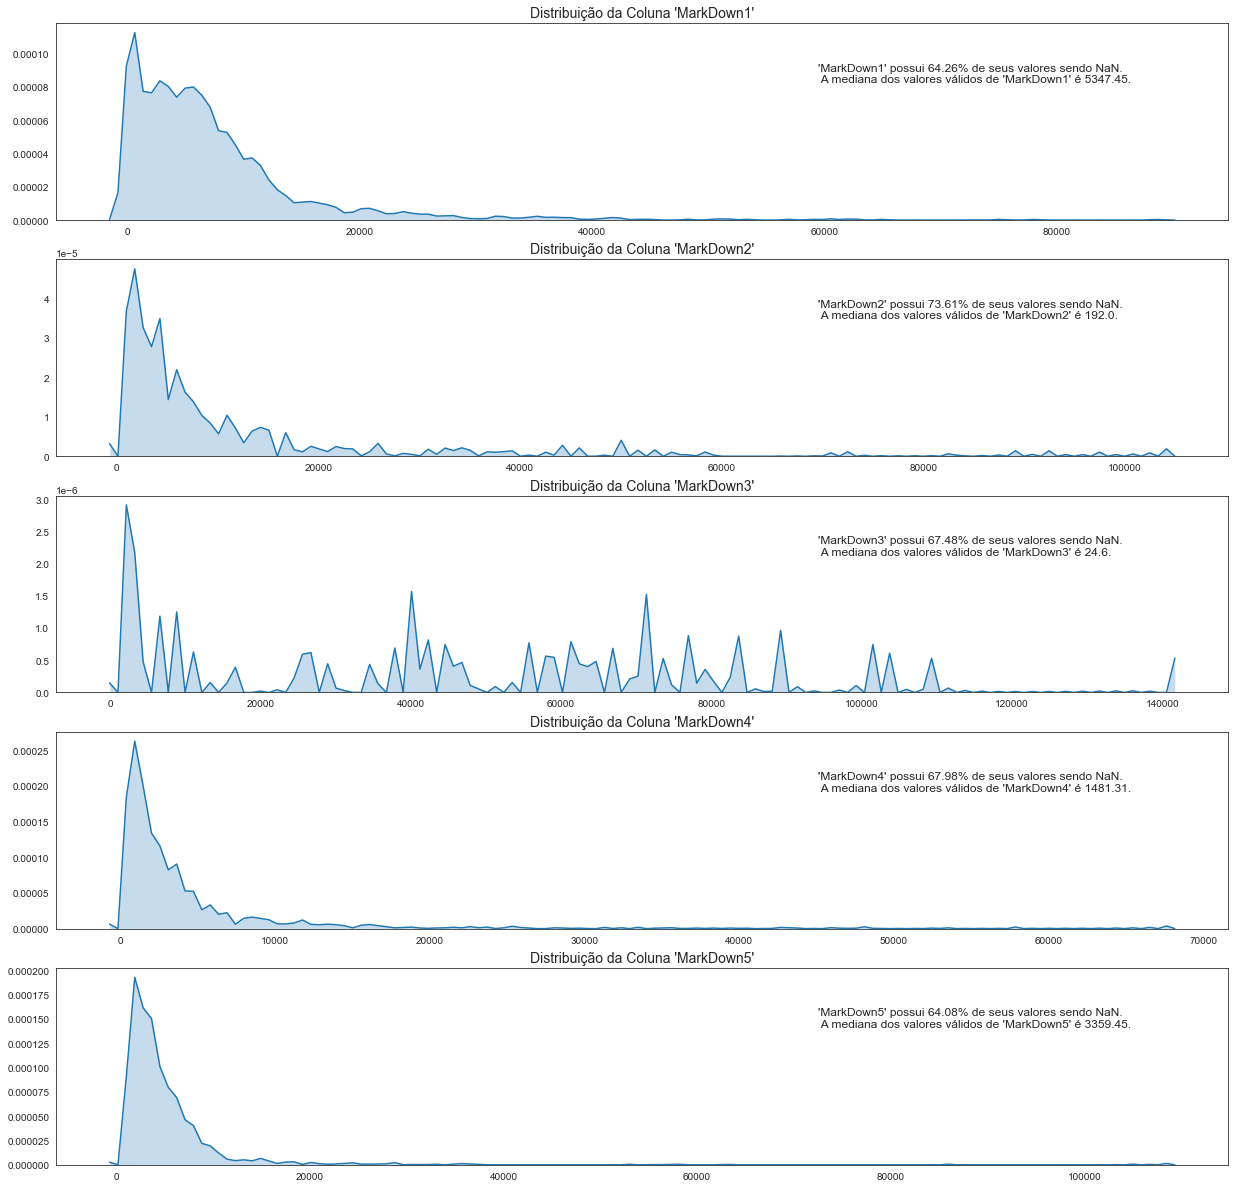

In [14]:
fig = plt.figure(figsize=(21,21))

for x in range(1, 6):
    plt.subplot(5,1,x)
    plt.title("Distribuição da Coluna 'MarkDown{}'".format(x), fontsize=14)
    sns.kdeplot(data=data['MarkDown{}'.format(x)], shade=True, legend=False)
    na_percentage = (100*data['MarkDown{}'.format(x)].isna().sum()/len(data['MarkDown{}'.format(x)])).round(2)
    median = np.nanmedian(data['MarkDown{}'.format(x)])
    plt.annotate("'MarkDown{}' possui {}% de seus valores sendo NaN.\n A mediana dos valores válidos de 'MarkDown{}' é {}."
                 .format(x, na_percentage, x, median), xy=(0.65, 0.7), xycoords='axes fraction', fontsize=12)
    
plt.show()

A porcentagem de valores NaN em todas as cinco colunas `MarkDown` supera os 64%, e todos possuem uma assimetria positiva. É razoável supor que os valores NaN destas colunas aproximam-se de 0, e assim eles serão substituídos.

In [15]:
for x in range(1,6):
    for df in full_data:
        df['MarkDown{}'.format(x)].fillna(0, inplace=True)

## 3. Análise Exploratória dos Dados

### 3.1. Resumo Executivo

Esta etapa envolve toda a análise exploratória dos dados.

Observa-se que os meses de maior quantidade de vendas são Novembro e Dezembro, devido ao aumento expressivo destas em alguns departamentos. As lojas de tipo 'A' possuem grande tamanho e muitas semanas consideradas *outliers* em vendas, enquanto a loja do tipo 'C' segue o padrão oposto.

Nota-se uma correlação positiva considerável entre `CPI` e `Fuel_Price`, e uma negativa consideravel entre estas e `Unemployment`. Não é notada correlação considerável entre `Weekly_Sales` e `IsHoliday`.

### 3.2. Completo

#### Análise de Vendas Anuais e Semanais

In [16]:
sales_per_week = data.groupby('Date').agg({'Weekly_Sales':'sum','IsHoliday':'max'})

sales_per_year = pd.DataFrame(columns=['Year', 'Total_Sales', 'Weekly_Average'])

temporary = pd.DataFrame(sales_per_week)
temporary['Year'] = temporary.index.strftime('%Y')
sales_per_year = temporary.groupby('Year').agg({'Weekly_Sales':'sum'})
sales_per_year.columns = ['Year_Sales']
sales_per_year['N_of_weeks'] = temporary['Year'].value_counts()
sales_per_year['Week_Avg'] = sales_per_year['Year_Sales']/sales_per_year['N_of_weeks']

sales_per_year

,Year_Sales,N_of_weeks,Week_Avg
Year,,,
2010,2.288886e+09,48,4.768513e+07
2011,2.448200e+09,52,4.708077e+07
2012,2.000133e+09,43,4.651472e+07


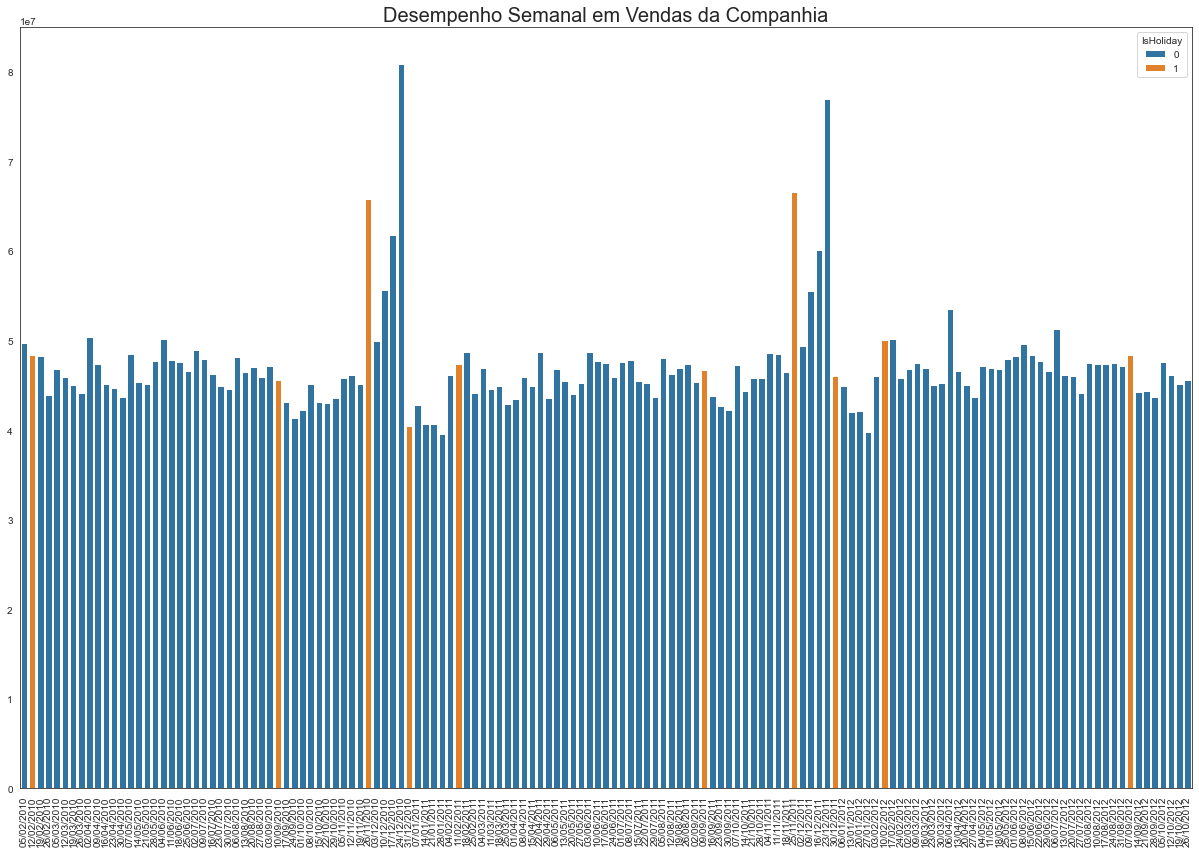

In [17]:
plt.figure(figsize=(21,14))

sns.barplot(data=sales_per_week, x=sales_per_week.index , y='Weekly_Sales', hue='IsHoliday', dodge=False)

plt.title("Desempenho Semanal em Vendas da Companhia", fontsize=20)
plt.xticks(range(len(sales_per_week.index)), sales_per_week.index.strftime("%d/%m/%Y"))
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('')

plt.show()

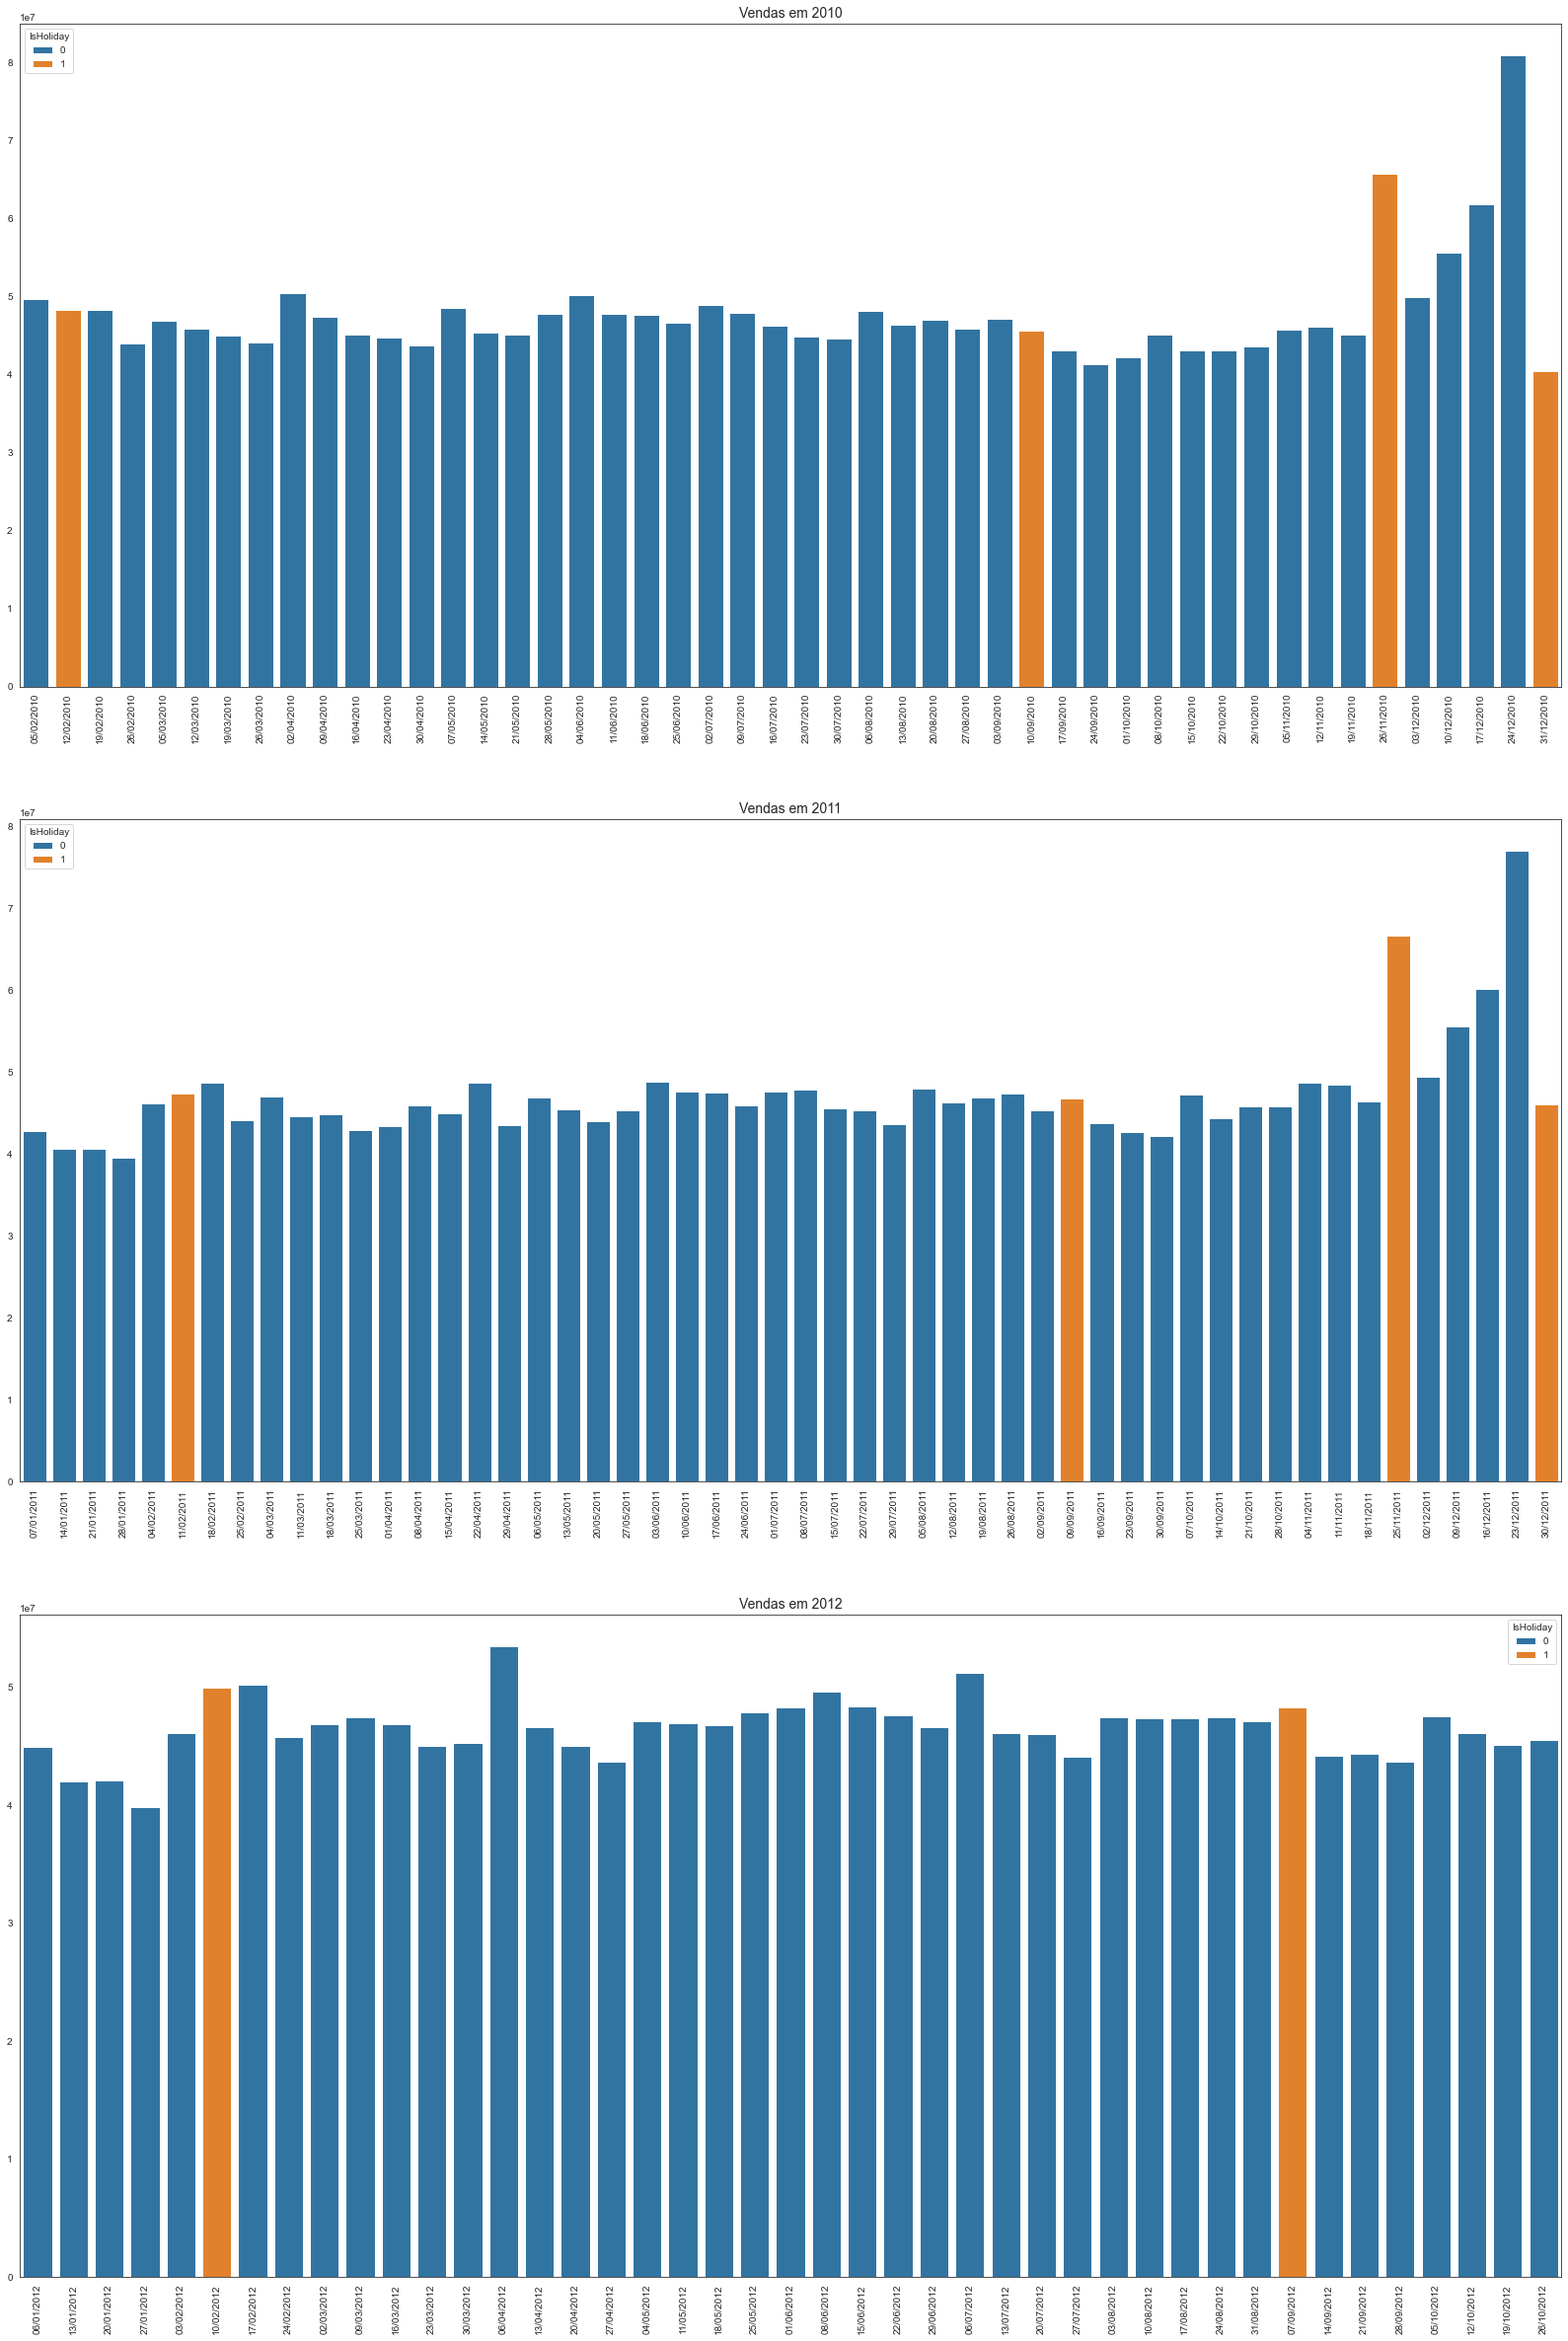

In [18]:
plt.figure(figsize=(28,42))

for x in range(1, 4):
    year = x+2009
    year_sales = sales_per_week[sales_per_week.index.strftime('%Y') == '{}'.format(year)]
    plt.subplot(3,1,x)
    plt.title("Vendas em {}".format(year), fontsize=14)
    sns.barplot(data=year_sales, x=year_sales.index , y='Weekly_Sales', hue='IsHoliday', dodge=False)
    plt.xticks(range(len(year_sales.index)), year_sales.index.strftime("%d/%m/%Y"))
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.ylabel('')

# plt.annotate("'MarkDown{}' possui {}% de seus valores sendo NaN.\n A mediana dos valores válidos de 'MarkDown{}' é {}."
#                  .format(x, na_percentage, x, median), xy=(0.65, 0.7), xycoords='axes fraction', fontsize=12)
plt.show()

Observa-se que, nos anos em que foram registradas as vendas em Novembro e Dezembro, foram nestes meses que a empresa mais vendeu. Nos demais meses, a empresa vendeu semanalmente valores em torno de 40 a 50 milhões de unidades monetárias. Já nos últimos dois meses de cada ano, ultrapassou os 60 milhões em ambas as semanas de Ações de Graças, e ultrapassou ou 70 milhões em ambas as semanas anteriores ao Natal.

Em todos os anos, o mês de pior desempenho em vendas é o de Janeiro, sendo a última semana de Setembro também recorrentemente baixa em vendas.

O desempenho anual em vendas da Companhia é estável, e o ano de 2012 (até o último dado de vendas coletado) assemelha-se muito aos anteriores.

#### Análise de Vendas por Loja

In [19]:
total_per_store = data.groupby('Store').agg({'Weekly_Sales':'sum','Temperature':'mean', 'Fuel_Price':'mean',
                                            'MarkDown1':'mean', 'MarkDown2':'mean', 'MarkDown3':'mean', 'MarkDown4':'mean', 
                                            'MarkDown5':'mean', 'CPI':'mean', 'Unemployment':'mean', 
                                             'Type': lambda x: x.value_counts().index[0], 
                                             'Size': 'mean'})

total_per_store = pd.DataFrame(total_per_store)
total_per_store.rename(columns={"Weekly_Sales": "Total_Sales"}, inplace=True)
total_per_store['Sales_per_Size'] = total_per_store['Total_Sales']/total_per_store['Size']
total_per_store.head()

,Total_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Sales_per_Size
Store,,,,,,,,,,,,,
1,2.224028e+08,68.224463,3.218811,2886.877467,873.291894,436.207316,1340.570529,1794.852645,215.995525,7.610918,A,151315,1469.800144
2,2.753824e+08,68.105435,3.219898,3815.003642,1571.495877,608.139075,1702.223652,2342.706654,215.651869,7.623279,A,202307,1361.210640
3,5.758674e+07,71.298627,3.219112,1104.843804,294.276057,288.622421,317.644571,455.513285,219.402843,7.175602,B,37392,1540.081704
4,2.995440e+08,62.176867,3.216237,3352.829782,1381.076520,686.803667,1839.689313,2438.110453,128.680070,5.965849,A,205863,1455.064550
5,4.547569e+07,69.203619,3.220912,1079.143440,300.162839,235.176435,395.045179,915.256248,216.576516,6.296549,B,34875,1303.962406


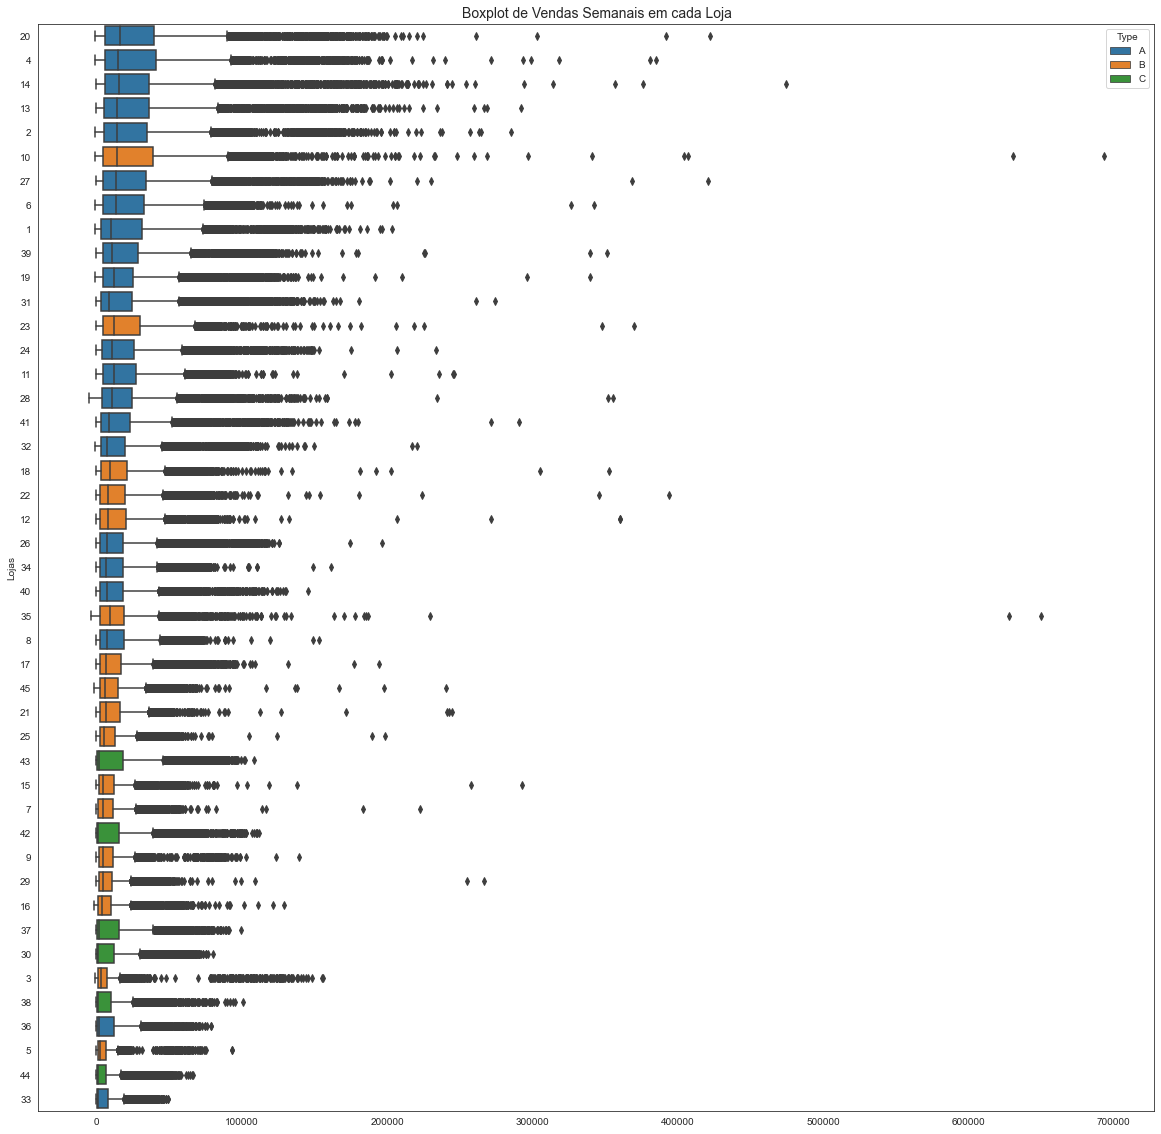

In [20]:
total_sales_sorting = total_per_store.sort_values('Total_Sales', ascending=False).index

plt.figure(figsize=(20,20))

sns.boxplot(data=data, x='Weekly_Sales', y='Store', hue='Type',
            dodge=False, orient='h', order=total_sales_sorting)
plt.title("Boxplot de Vendas Semanais em cada Loja", fontsize=14)
plt.xlabel('')
plt.ylabel('Lojas')

plt.show()

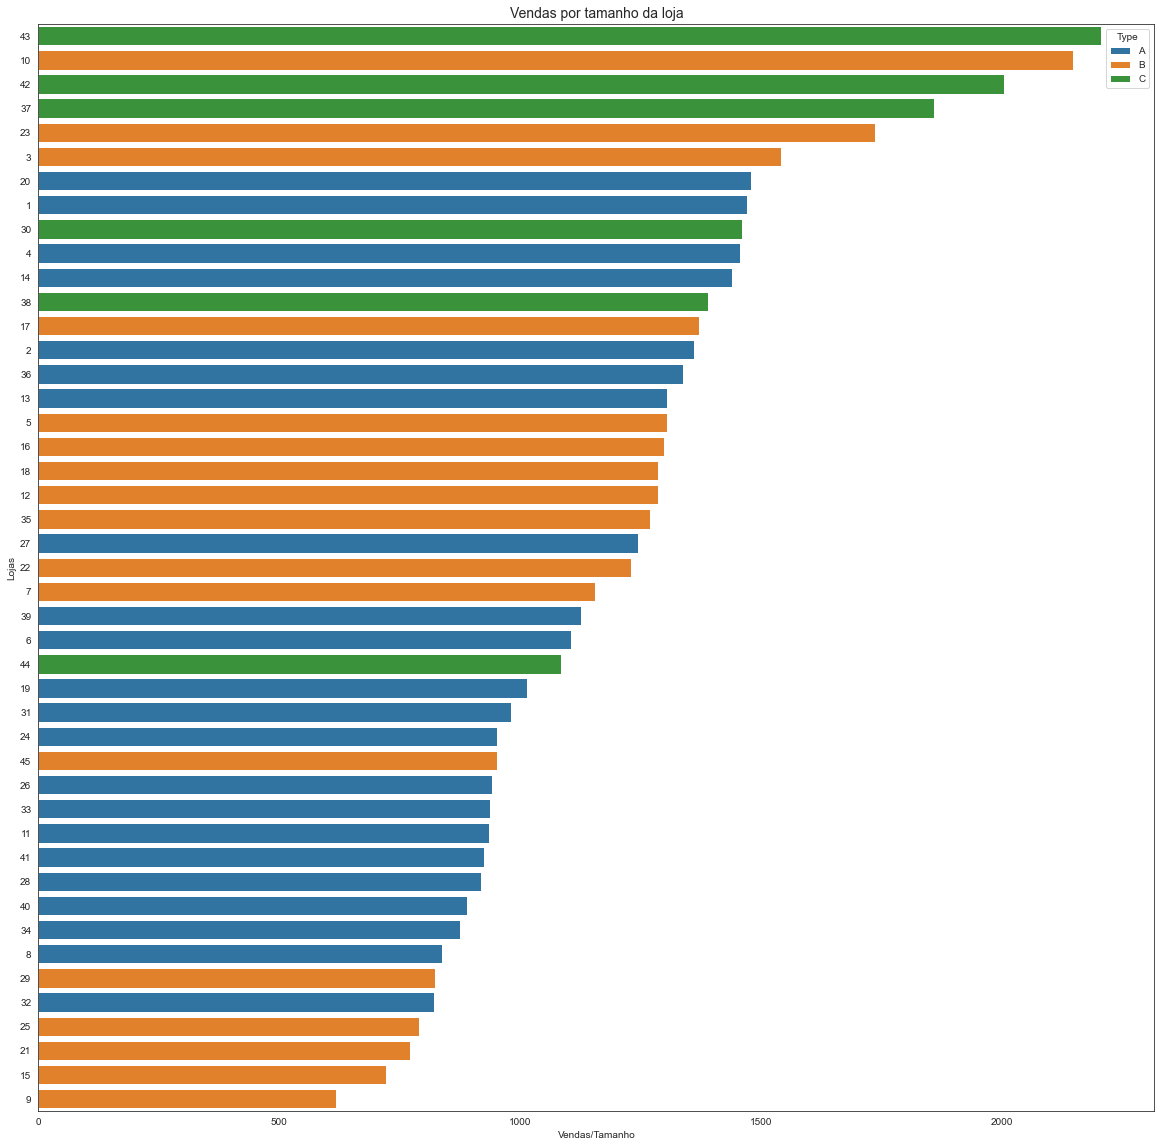

In [21]:
sales_size_sorting = total_per_store.sort_values('Sales_per_Size', ascending=False).index

plt.figure(figsize=(20,20))

sns.barplot(data=total_per_store, x='Sales_per_Size', y=total_per_store.index, hue='Type', dodge=False,
            orient='h', order=sales_size_sorting)
plt.title("Vendas por tamanho da loja", fontsize=14)
plt.xlabel('Vendas/Tamanho')
plt.ylabel('Lojas')

plt.show()

Alguns *insights* podem ser obtidos a partid dos gráficos acima:

- Apesar de não terem muitas vendas absolutas, as lojas do tipo 'C' possuem altíssimo número de vendas por área. De seis lojas do tipo 'C', três estão entre as quatro que mais vendem por área.
- As lojas do tipo 'A' possuem mais vendas absolutas que as outras, porém menor número por área.
- As duas observações acima sedimentam a hipótese de que o número de vendas, apesar de correlato positivamente à área, cresce a uma taxa bem menos expressiva que esta.
- As lojas de tipo 'C' possuem menos e mais concentrados *outliers* que as dos outros tipos.

#### Análise de Vendas por Departamento

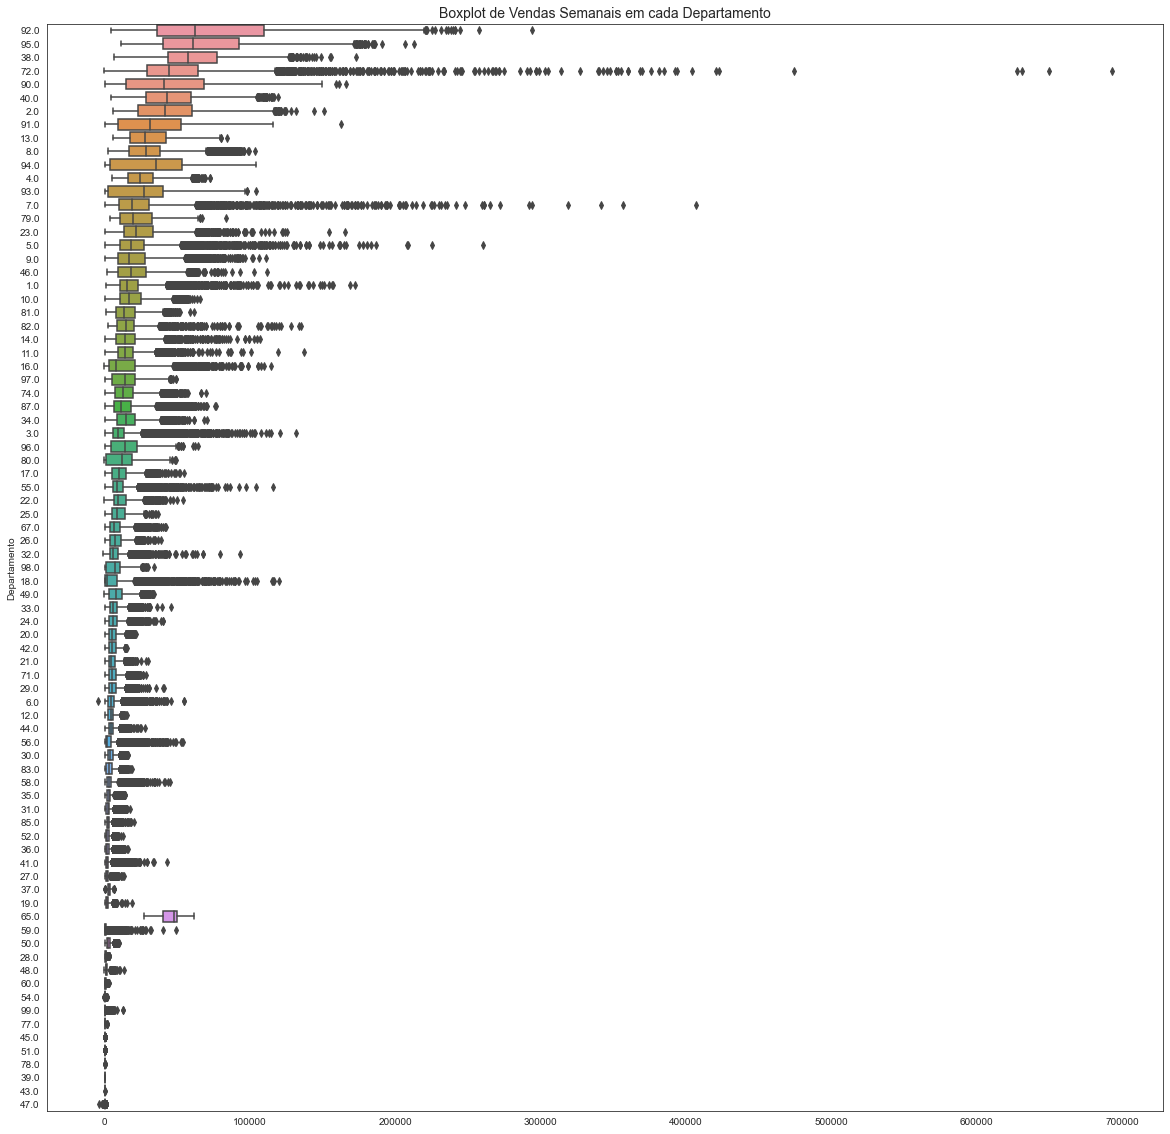

In [22]:
total_per_dept = data.groupby('Dept').agg({'Weekly_Sales':'sum', 'MarkDown1':'mean', 'MarkDown2':'mean', 
                                           'MarkDown3':'mean', 'MarkDown4':'mean', 'MarkDown5':'mean'})

total_per_dept = pd.DataFrame(total_per_dept)
total_per_dept.rename(columns={"Weekly_Sales": "Total_Sales"}, inplace=True)

total_sales_sorting = total_per_dept.sort_values('Total_Sales', ascending=False).index

plt.figure(figsize=(20,20))

sns.boxplot(data=data, x='Weekly_Sales', y='Dept', dodge=False, orient='h', order=total_sales_sorting)
plt.title("Boxplot de Vendas Semanais em cada Departamento", fontsize=14)
plt.xlabel('')
plt.ylabel('Departamento')

plt.show()

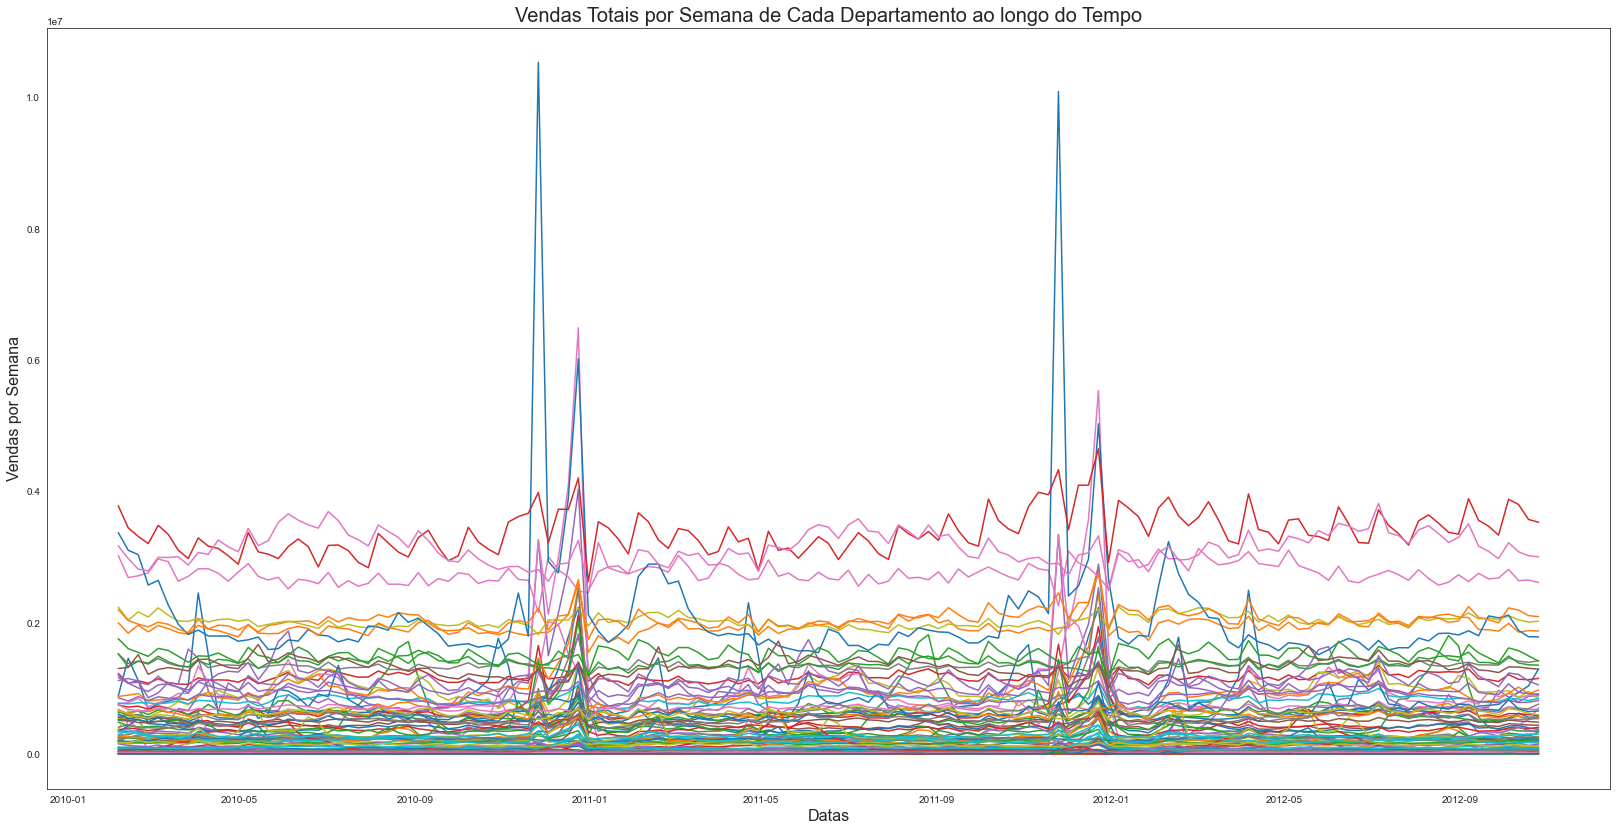

In [23]:
plt.figure(figsize=(28,14))

sales_dept_time = pd.pivot_table(data, index=['Date'], columns=['Dept'], values=['Weekly_Sales'], aggfunc=np.sum)


for col in sales_dept_time:
    sns.lineplot(data=sales_dept_time, x=sales_dept_time.index, y=col)
        
plt.ylabel('Vendas por Semana', fontsize=16)
plt.xlabel('Datas', fontsize=16)
plt.title('Vendas Totais por Semana de Cada Departamento ao longo do Tempo', fontsize=20)

plt.show()

Pelos dois gráficos acima, vê-se que os picos de vendas totais observados nos gráficos anteriores se dão pelo aumento significativo nas vendas de determinados departamentos, e não de todos eles. Em especial, os departamentos **5, 7 e 72** possuem ***outliers* altíssimos** no período **entre Ação de Graças e Ano Novo**.

#### Correlações entre as colunas

As lojas são localizadas em locais distintos, com diferentes características climáticas e sociais, e possuem diferentes tamanhos e possíveis diferentes desempenhos em vendas. Dada esta reflexão, o **cálculo correto de correlação entre os atributos há de ser feita separadamente** em cada loja, para depois calcular-se a média entre as correlações, obtendo a correlação entre os atributos com as vendas totais da companhia.

In [24]:
all_corr = pd.DataFrame()
for x in range(1,46):
    store = data[data['Store']==x]
    store_df = pd.DataFrame(store.groupby('Date').agg({'Weekly_Sales':'sum', 'IsHoliday':lambda x: x.value_counts().index[0],
                                                   'Temperature':'mean',
                                                   'Fuel_Price':'mean', 'MarkDown1':'sum', 'MarkDown2':'sum', 
                                                   'MarkDown3':'sum', 'MarkDown4':'sum','MarkDown5':'sum', 
                                                   'CPI':'mean', 'Unemployment':'mean'}))
    corr = store_df.corr()
    all_corr= pd.concat([all_corr,corr])

columns = ['Weekly_Sales', 'IsHoliday', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 
           'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
total_corr = all_corr.groupby(all_corr.index).mean().reindex(columns)

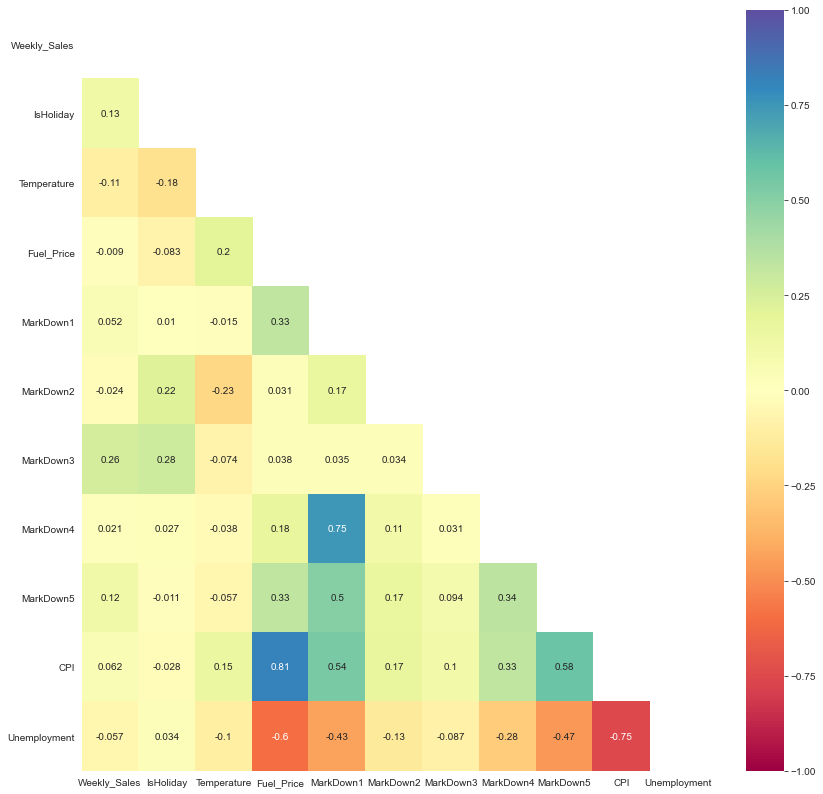

In [25]:
plt.figure(figsize=(14,14))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(total_corr, mask=mask, annot=True, vmin=-1, vmax=1, cmap='Spectral')
plt.yticks(rotation=0)

plt.show()

Nota-se uma correlação positiva altíssima (0.81) entre as colunas `CPI` e `Fuel_Price`, enquanto esta tem uma correlação negativa considerável com `Unemployment` (-0.6). A coluna `CPI` e esta, por sua vez, possuem uma correlação também negativa de -0.75.

Ao contrário do que era esperado, não se nota uma correlação tão relevante entre `Weekly_Sales` e `IsHoliday`, provavelmente devido ao fato de que, dos 4 eventos considerados proeminentes, um deles (Ano Novo) não envolve compra de presentes, enquanto o foco de outro (Natal) é a compra acentuada na semana anterior ao mesmo.

## 4. Análise Preditiva

### 4.1. Resumo Executivo

Em breve!

### 4.2. Completo

Em breve!

## 5. Conclusões

Em breve!

## 6. Próximos Passos e Considerações Finais

Em breve!